# **EDA | Cookie Cats A/B Test**

This notebook analyzes an A/B test comparing two gate placements in Cookie Cats (level 30 vs level 40). It explores how gate placement affects 1-day and 7-day retention and user engagement (game rounds). The analysis includes descriptive statistics, visualizations, and comparisons to determine which placement performs better.


## Import Libraries


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data


In [79]:
df = pd.read_csv('dataset/cookie_cats.csv')

## Dataset Overview


In [80]:
print("Dataset Shape:", df.shape)

Dataset Shape: (90189, 5)


The dataset contains **90,189 rows** and **5 columns**, representing user data from the Cookie Cats A/B test.


## First Few Rows


In [81]:
print("First few rows:")
print(df.head())

First few rows:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


## Dataset Information


In [82]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None


## Basic Statistics


In [83]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000


**Key Observations:**
- The mean number of game rounds is **51.87**, but the median is only **16**, indicating a right-skewed distribution with many users playing few rounds and a few users playing many rounds.
- The maximum value of **49,854** game rounds is an extreme outlier, significantly higher than the 75th percentile of 51.

## Missing Values Check


In [84]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


## Data Types


In [85]:
print("Data Types:")
print(df.dtypes)

Data Types:
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object


## Retention Analysis by Version


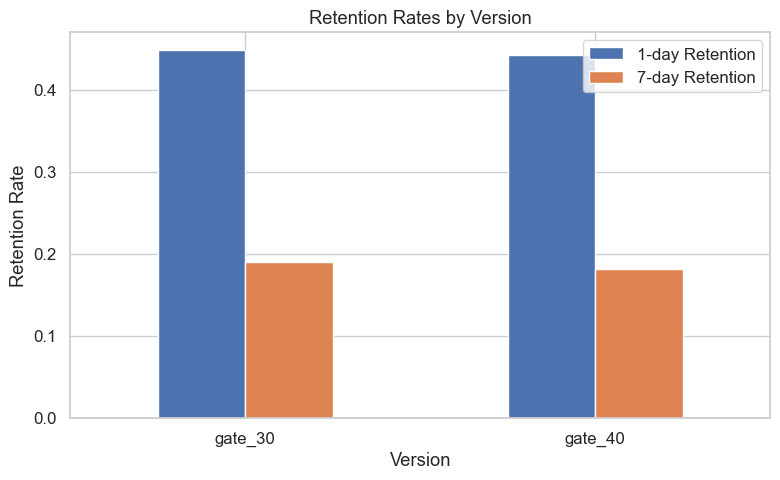

In [86]:
retention_by_version = df.groupby('version')[['retention_1', 'retention_7']].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
retention_by_version.set_index('version').plot(kind='bar', ax=ax)
ax.set_title('Retention Rates by Version')
ax.set_xlabel('Version')
ax.set_ylabel('Retention Rate')
ax.legend(['1-day Retention', '7-day Retention'])
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Key Findings:**
- **gate_30** shows slightly higher retention rates for both 1-day (44.82%) and 7-day (19.02%) retention compared to **gate_40** (44.23% and 18.20% respectively).
- The difference is small but consistent - gate_30 performs better on both retention metrics.
- Both versions show a significant drop-off from 1-day to 7-day retention, which is expected as users naturally churn over time.


## Mean Game Rounds by Version


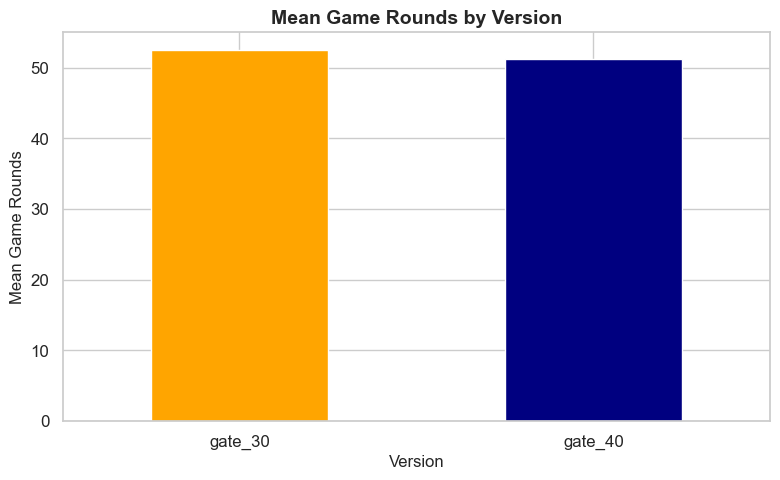

In [87]:
mean_game_rounds = df.groupby('version')['sum_gamerounds'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
mean_game_rounds.plot(x='version', y='sum_gamerounds', kind='bar', ax=ax, 
                      color=['orange', 'navy'], legend=False)
ax.set_title('Mean Game Rounds by Version', fontsize=14, fontweight='bold')
ax.set_xlabel('Version', fontsize=12)
ax.set_ylabel('Mean Game Rounds', fontsize=12)
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Key Findings:**
- **gate_30** has a slightly higher mean game rounds (52.46) compared to **gate_40** (51.30).
- This aligns with the retention findings, where gate_30 shows slightly better performance.


## Summary Statistics by Version


In [88]:
print("Summary: sum_gamerounds by Version")
print("="*40)
gamerounds_summary = df.groupby('version')['sum_gamerounds'].agg(['mean', 'median', 'std', 'min', 'max'])
print(gamerounds_summary)
print("\n")

print("Mean Retention by Version")
print("="*40)
retention_summary = df.groupby('version')[['retention_1', 'retention_7']].mean()
print(retention_summary)

Summary: sum_gamerounds by Version
              mean  median         std  min    max
version                                           
gate_30  52.456264    17.0  256.716423    0  49854
gate_40  51.298776    16.0  103.294416    0   2640


Mean Retention by Version
         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000


## Distribution of game rounds for the first 200 rounds


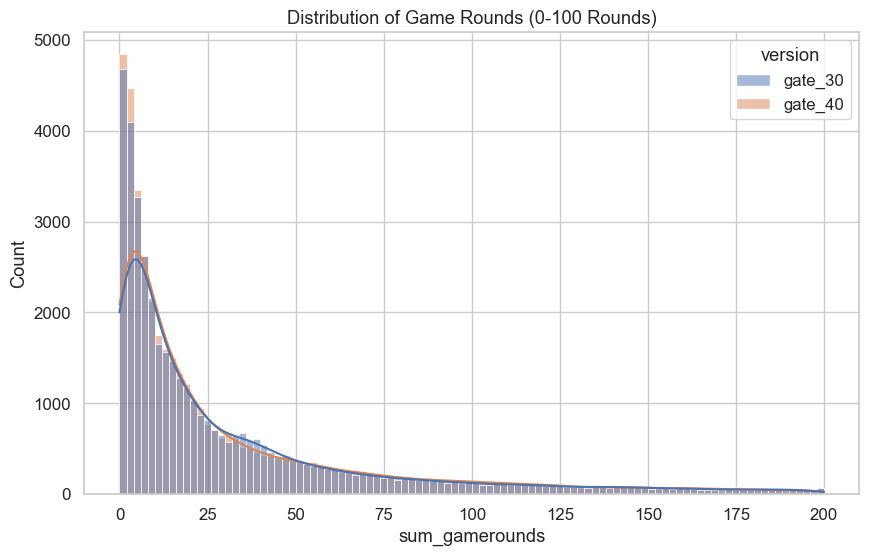

In [89]:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df[df['sum_gamerounds'] <= 200], x='sum_gamerounds', hue='version', kde=True, bins=100, ax=ax)
    ax.set_title('Distribution of Game Rounds (0-100 Rounds)')
    plt.show()

## Relationship Between Engagement and Retention

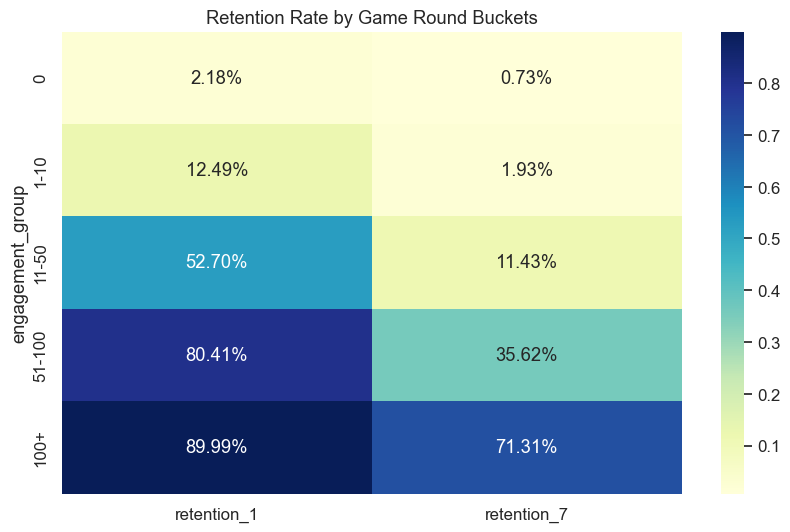

In [90]:
    df['engagement_group'] = pd.cut(
        df['sum_gamerounds'],
        bins=[-1, 0, 10, 50, 100, 100000],
        labels=['0', '1-10', '11-50', '51-100', '100+']
    )

    retention_by_engagement = df.groupby('engagement_group', observed=False)[['retention_1', 'retention_7']].mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(retention_by_engagement, annot=True, cmap='YlGnBu', fmt='.2%')
    plt.title('Retention Rate by Game Round Buckets')
    plt.show()

**Key Findings**:
- Players who complete just 10 rounds are drastically more likely to return, with 1-day retention jumping from ~12% to over 50%. This identifies the first 10 levels as the critical "hook" for user loyalty.

## Zero-Plays Analysis

In [91]:
    zero_plays = df[df['sum_gamerounds'] == 0].groupby('version')['userid'].count()
    total_users = df.groupby('version')['userid'].count()
    
    print("Percentage of users with 0 game rounds:")
    print((zero_plays / total_users) * 100)

Percentage of users with 0 game rounds:
version
gate_30    4.333333
gate_40    4.521972
Name: userid, dtype: float64


## Retention Overlap Analysis

Retention Overlap (Row %):
retention_7     False     True 
retention_1                    
False        0.928072  0.071928
True         0.671706  0.328294


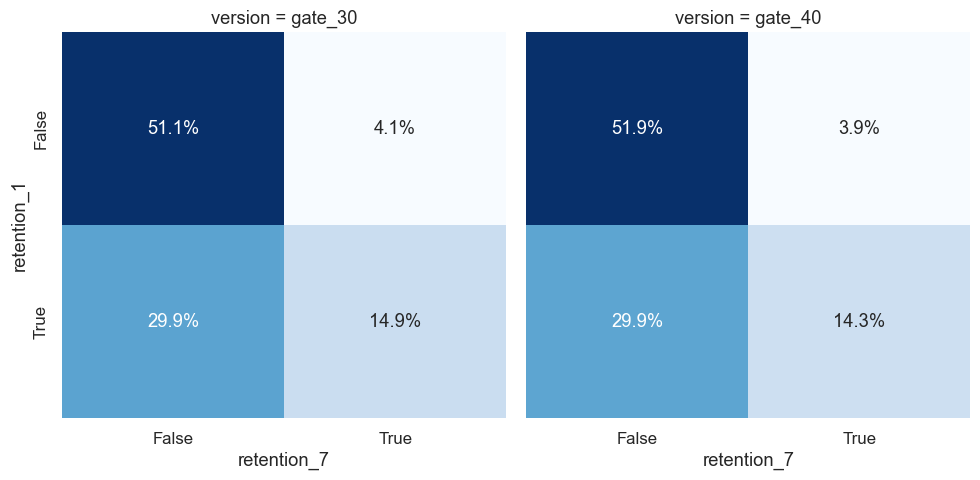

In [92]:
    # Cross-tabulation of Retention 1 vs Retention 7
    crosstab = pd.crosstab(df['retention_1'], df['retention_7'], normalize='index')
    
    print("Retention Overlap (Row %):")
    print(crosstab)

    # Visualize the flow for each version
    g = sns.FacetGrid(df, col="version", height=5)
    g.map_dataframe(lambda data, **kws: sns.heatmap(
        pd.crosstab(data['retention_1'], data['retention_7'], normalize=True),
        annot=True, fmt='.1%', cmap='Blues', cbar=False
    ))
    plt.show()